# Chapter 4: Structured Arrays and Financial Data 

Structured arrays are a versatile tool in NumPy for handling complex datasets where elements possess multiple attributes of varying data types. Imagine them as rows in a database table but with the efficiency and speed of NumPy . This structure is particularly advantageous when working with financial data, which often involves multiple variables like dates, prices, volumes, and more.

In this chapter, we'll delve into the world of structured arrays, exploring how to create, manipulate, and analyze them. We'll also demonstrate how to seamlessly integrate them with financial data, unlocking powerful capabilities for data-driven financial insights.

## 4.1 Introduction to Structured Arrays

Structured arrays offer a unique approach to handling data with diverse components, resembling both database tables and pandas DataFrames. Unlike traditional NumPy arrays that store homogeneous data types, structured arrays allow for heterogeneous elements, where each element can contain multiple fields with different data types (e.g., integers, floats, strings). This flexibility makes them ideal for representing complex datasets, such as financial data, which often involves various attributes like dates, prices, volumes, and textual information.

While NumPy structured arrays are efficient for numerical operations, pandas provides a higher-level abstraction with additional functionality, such as indexing, grouping, and advanced data manipulation. In Chapter 5, we will explore pandas in greater depth and discuss its advantages over NumPy for certain tasks.

In [1]:
import numpy as np

# Regular ndarray object
a = np.linspace(0, 15, 20)  # linspace(start, stop, num) returns 'num' evenly spaced numbers over a specified interval [start, stop]
print("Regular ndarray object:", a)  # Prints ndarray
print("Data type of elements:", a.dtype)  # Prints datatype of ndarray object (float)

Regular ndarray object: [ 0.          0.78947368  1.57894737  2.36842105  3.15789474  3.94736842
  4.73684211  5.52631579  6.31578947  7.10526316  7.89473684  8.68421053
  9.47368421 10.26315789 11.05263158 11.84210526 12.63157895 13.42105263
 14.21052632 15.        ]
Data type of elements: float64


The output above is generated using np.linspace, which creates an array of evenly spaced numbers between a specified range (0 to 15) with 20 elements. This is not random number generation but rather a deterministic function that divides the range into equal intervals.

In [2]:
# Tuples representing structured data
t1 = (1, 2.5, 'A')
t2 = (2, 3.5, 'B')
t3 = (3, 4.5, 'C')

In [3]:
# Creating structured arrays
sa = np.array([t1, t2, t3], dtype='i8, f8, O')  # 'O' specifies an object data type for the third element. This is flexible and can hold any Python object.
print("Structured array with default dtype:\n", sa)

Structured array with default dtype:
 [(1, 2.5, 'A') (2, 3.5, 'B') (3, 4.5, 'C')]


#### Code Breakdown:

- `dtype='i8, f8, O'`: The component that defines the data type of the structured array.

- `i8`: Specifies a 64-bit integer data type for the first element in each record of the array.

- `f8`: Specifies a 64-bit floating-point data type for the second element.

- `O`: Specifies an 'object' data type that can hold any Python object.

In [4]:
# Defining a custom dtype
dt = np.dtype({'names': list('xyz'), 'formats': ['i8', 'f8', 'O']})
print("Custom dtype:\n", dt)

Custom dtype:
 [('x', '<i8'), ('y', '<f8'), ('z', 'O')]


In [5]:
# Creating structured arrays with custom dtype
sa = np.array([t1, t2, t3], dtype=dt)
print("Structured array with custom dtype:\n", sa)

Structured array with custom dtype:
 [(1, 2.5, 'A') (2, 3.5, 'B') (3, 4.5, 'C')]


In [6]:
# Accessing fields
print("Field 'x':", sa['x'])

Field 'x': [1 2 3]


In [7]:
print("Mean of field 'x':", sa['x'].mean())

Mean of field 'x': 2.0


In [8]:
print("Field 'y':", sa['y'])

Field 'y': [2.5 3.5 4.5]


In [9]:
print("Field 'z':", sa['z'])

Field 'z': ['A' 'B' 'C']


In [10]:
print("Second record:", sa[1])

Second record: (2, 3.5, 'B')


In [11]:
print("First two records:\n", sa[0:2])

First two records:
 [(1, 2.5, 'A') (2, 3.5, 'B')]


## 4.2 Fetching Financial Data with Tiingo API
We'll use the Tiingo API to fetch financial data and work with it in structured arrays.

In [12]:
from tiingo import TiingoClient
import os
import numpy as np
import pandas as pd

# Set your Tiingo API key
os.environ['TIINGO_API_KEY'] = ''
client = TiingoClient()

# Fetching stock data for multiple tickers
tickers = ["MSFT", "AAPL", "GOOGL"]
start_date = '2023-01-01'
end_date = '2023-01-31'
data = {}

for ticker in tickers:
    historical_prices = client.get_ticker_price(ticker, fmt='json', startDate=start_date, endDate=end_date, frequency='daily')
    dates = [entry['date'] for entry in historical_prices]
    prices = [entry['close'] for entry in historical_prices]
    data[ticker] = prices

data['Date'] = dates

In [13]:
# Converting the data to a pandas DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure dates are in datetime format
df.set_index('Date', inplace=True)
print("DataFrame:\n", df.head())

DataFrame:
                              MSFT    AAPL  GOOGL
Date                                            
2023-01-03 00:00:00+00:00  239.58  125.07  89.12
2023-01-04 00:00:00+00:00  229.10  126.36  88.08
2023-01-05 00:00:00+00:00  222.31  125.02  86.20
2023-01-06 00:00:00+00:00  224.93  129.62  87.34
2023-01-09 00:00:00+00:00  227.12  130.15  88.02


## 4.3 Converting DataFrame to Structured Array

In [14]:
# Converting the DataFrame to a structured NumPy array
structured_array = df.to_records()  # to_records() function converts DataFrame to NumPy record array
print("Structured Array:\n", structured_array)

Structured Array:
 [(Timestamp('2023-01-03 00:00:00+0000', tz='UTC'), 239.58, 125.07, 89.12)
 (Timestamp('2023-01-04 00:00:00+0000', tz='UTC'), 229.1 , 126.36, 88.08)
 (Timestamp('2023-01-05 00:00:00+0000', tz='UTC'), 222.31, 125.02, 86.2 )
 (Timestamp('2023-01-06 00:00:00+0000', tz='UTC'), 224.93, 129.62, 87.34)
 (Timestamp('2023-01-09 00:00:00+0000', tz='UTC'), 227.12, 130.15, 88.02)
 (Timestamp('2023-01-10 00:00:00+0000', tz='UTC'), 228.85, 130.73, 88.42)
 (Timestamp('2023-01-11 00:00:00+0000', tz='UTC'), 235.77, 133.49, 91.52)
 (Timestamp('2023-01-12 00:00:00+0000', tz='UTC'), 238.51, 133.41, 91.13)
 (Timestamp('2023-01-13 00:00:00+0000', tz='UTC'), 239.23, 134.76, 92.12)
 (Timestamp('2023-01-17 00:00:00+0000', tz='UTC'), 240.35, 135.94, 91.29)
 (Timestamp('2023-01-18 00:00:00+0000', tz='UTC'), 235.81, 135.21, 91.12)
 (Timestamp('2023-01-19 00:00:00+0000', tz='UTC'), 231.93, 135.27, 93.05)
 (Timestamp('2023-01-20 00:00:00+0000', tz='UTC'), 240.22, 137.87, 98.02)
 (Timestamp('2023-0

In [15]:
# Accessing specific fields
print("AAPL field:", structured_array['AAPL'])

AAPL field: [125.07 126.36 125.02 129.62 130.15 130.73 133.49 133.41 134.76 135.94
 135.21 135.27 137.87 141.11 142.53 141.86 143.96 145.93 143.   144.29]


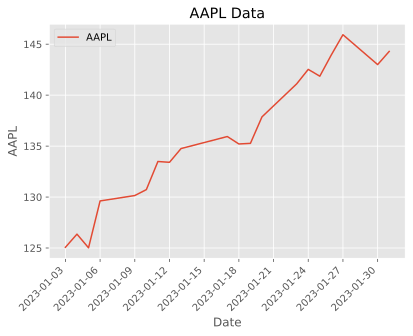

In [16]:
# Plotting the data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Use ggplot style 
try:
    plt.style.use('ggplot')
except OSError:
    print("ggplot style not found. Using default style.")
    plt.style.use('default')

get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

# Converting date strings to datetime objects
dates = structured_array['Date']
fig, ax = plt.subplots()
ax.plot(dates, structured_array['AAPL'], label='AAPL', linestyle='-')
ax.set_title("AAPL Data")
ax.set_xlabel("Date")
ax.set_ylabel("AAPL")
ax.legend()

# Formatting date axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)

plt.show()

In [17]:
print("Mean of AAPL:", structured_array['AAPL'].mean())  # Calculating mean

Mean of AAPL: 135.779


In [18]:
print("Standard deviation of AAPL:", structured_array['AAPL'].std())  # Calculating standard deviation

Standard deviation of AAPL: 6.467860465408947


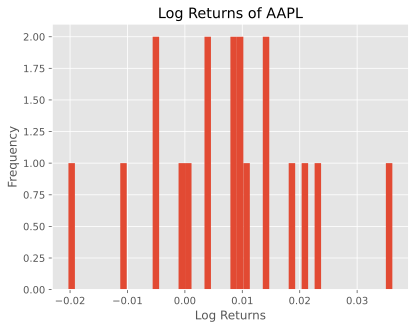

In [19]:
# Calculating log returns
lr = np.log(structured_array['AAPL'][1:] / structured_array['AAPL'][:-1])
plt.hist(lr, bins=50)
plt.title("Log Returns of AAPL")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.show()

## 4.4 Data Analysis and Visualization
In this section, we will perform various data analysis tasks and visualize the results.
### 4.4.1 Time Series Analysis
We will analyze the time series data of the fetched stock prices.

<Figure size 1000x600 with 0 Axes>

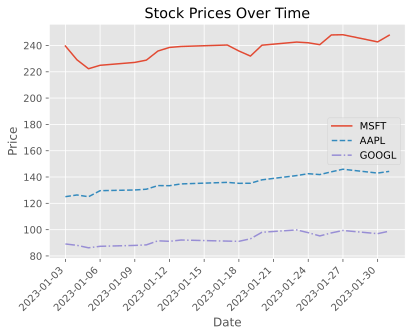

In [20]:
# This line defines a list named line_styles containing four different line styles:
line_styles = ['-', '--', '-.', ':']

# Plotting stock prices over time
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i, ticker in enumerate(tickers):
    ax.plot(dates, structured_array[ticker], label=ticker, linestyle=line_styles[i % len(line_styles)])

ax.set_title("Stock Prices Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()

# Formatting date axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)

plt.show()

In [21]:
# Calculating daily returns
returns = df.pct_change().dropna()  # dropna() removes missing values caused by percentage change calculations
print("Daily Returns:\n", returns.head())

Daily Returns:
                                MSFT      AAPL     GOOGL
Date                                                   
2023-01-04 00:00:00+00:00 -0.043743  0.010314 -0.011670
2023-01-05 00:00:00+00:00 -0.029638 -0.010605 -0.021344
2023-01-06 00:00:00+00:00  0.011785  0.036794  0.013225
2023-01-09 00:00:00+00:00  0.009736  0.004089  0.007786
2023-01-10 00:00:00+00:00  0.007617  0.004456  0.004544


The dropna() function removes rows with missing values (NaN) that result from calculating percentage changes. For example, the first row cannot have a percentage change because there is no prior value to compare it to.

<Figure size 1000x600 with 0 Axes>

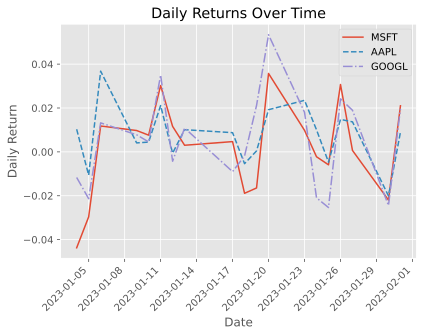

In [22]:
# Plotting daily returns
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i, ticker in enumerate(tickers):
    ax.plot(returns.index, returns[ticker], label=ticker, linestyle=line_styles[i % len(line_styles)])

ax.set_title("Daily Returns Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Daily Return")
ax.legend()

# Formatting date axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)

plt.show()

In [23]:
# Statistical summary of returns
print("Statistical Summary of Returns:\n", returns.describe())

Statistical Summary of Returns:
             MSFT       AAPL      GOOGL
count  19.000000  19.000000  19.000000
mean    0.001990   0.007633   0.005680
std     0.021079   0.013107   0.021501
min    -0.043743  -0.020078  -0.025384
25%    -0.011181  -0.000078  -0.010340
50%     0.004682   0.009021   0.007786
75%     0.011703   0.014244   0.019285
max     0.035744   0.036794   0.053412


### 4.4.2 Correlation Analysis

We will analyze the correlation between the stock prices of different companies. Correlation analysis is a statistical method used to determine the strength and direction of the relationship between two variables. Understanding correlations is crucial in portfolio construction because it helps identify diversification opportunities. Stocks with low or negative correlations can reduce overall portfolio risk.
#### Key Points:
- Strength of relationship: Correlation coefficients range from -1 to +1.

    - A correlation of +1 indicates a perfect positive correlation, meaning the two variables move in the same direction.   

    - A correlation of -1 indicates a perfect negative correlation, meaning the two variables move in opposite directions.   

    - A correlation of 0 indicates no linear relationship between the variables.   

In [24]:
# Calculating correlation matrix
correlation_matrix = df[tickers].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
            MSFT      AAPL     GOOGL
MSFT   1.000000  0.834124  0.868013
AAPL   0.834124  1.000000  0.930594
GOOGL  0.868013  0.930594  1.000000


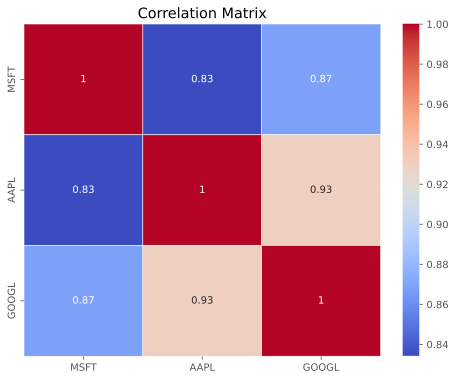

In [25]:
# Plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## 4.5 Additional Financial Data Analysis
### 4.5.1 Volatility Analysis
Volatility is a statistical measure of the dispersion of returns for an investment over a specific period of time. Understanding volatility is crucial for investors as it helps assess risk and potential returns.

In [26]:
# Calculating rolling volatility with a smaller window
rolling_window = 5
rolling_volatility = returns.rolling(window=rolling_window).std() * np.sqrt(252)  # Annualized rate (252 trading days in a year)
print("Annualized Rolling Volatility:\n", rolling_volatility.head())

Annualized Rolling Volatility:
                                MSFT      AAPL     GOOGL
Date                                                   
2023-01-04 00:00:00+00:00       NaN       NaN       NaN
2023-01-05 00:00:00+00:00       NaN       NaN       NaN
2023-01-06 00:00:00+00:00       NaN       NaN       NaN
2023-01-09 00:00:00+00:00       NaN       NaN       NaN
2023-01-10 00:00:00+00:00  0.411828  0.275337  0.229605


<Figure size 1000x600 with 0 Axes>

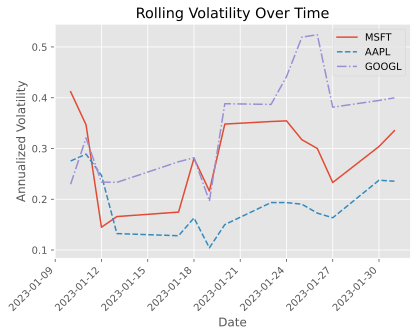

In [27]:
# Plotting rolling volatility
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i, ticker in enumerate(tickers):
    ax.plot(rolling_volatility.index, rolling_volatility[ticker], label=ticker, linestyle=line_styles[i % len(line_styles)])

ax.set_title("Rolling Volatility Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Annualized Volatility")
ax.legend()

# Formatting date axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)

plt.show()

### 4.5.2 The Basic Value at Risk (VaR)

Value at Risk (VaR) is a statistical measure of the maximum potential loss an investment or portfolio can incur over a specific time horizon with a given probability. For example, a VaR of 1 million at a 95 percent confidence level means there is a 5 percent chance of losing 1 million or more over the specified timeframe.

In [28]:
# Calculating daily VaR
var_95 = returns.quantile(0.05)
print("Daily VaR at 95% confidence level:\n", var_95)

Daily VaR at 95% confidence level:
 MSFT    -0.031048
AAPL    -0.011552
GOOGL   -0.024547
Name: 0.05, dtype: float64


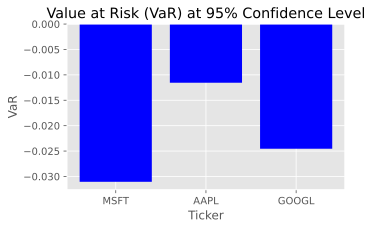

In [29]:
# Plotting VaR
plt.figure(figsize=(5, 3))
plt.bar(var_95.index, var_95, color='blue')
plt.title("Value at Risk (VaR) at 95% Confidence Level")
plt.xlabel("Ticker")
plt.ylabel("VaR")
plt.show()

##  4.6 Summary 
Structured arrays in NumPy provide a powerful mechanism for handling complex datasets with multiple attributes of varying data types, similar to rows in a database table. This is especially useful for financial data, where different variables like dates, prices, and volumes need to be managed efficiently.